## 1. Exploratory Data Analysis (EDA) Notebook

### A. Data Inspection

#### Load Data

In [28]:
import pandas as pd

df = pd.read_csv('sales_data.csv', parse_dates=['weekend_date'])

#### Check Data Structure


In [29]:
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   weekend_date  600 non-null    object
 1   channel       600 non-null    object
 2   brand         600 non-null    object
 3   category      600 non-null    object
 4   sub_category  600 non-null    object
 5   SerailNum     600 non-null    int64 
 6   quantity      600 non-null    int64 
dtypes: int64(2), object(5)
memory usage: 32.9+ KB
None
        SerailNum     quantity
count  600.000000   600.000000
mean     3.048333   547.330000
std      1.399737   925.749108
min      1.000000     1.000000
25%      2.000000   121.000000
50%      3.000000   244.500000
75%      4.000000   624.500000
max      5.000000  8051.000000
weekend_date    0
channel         0
brand           0
category        0
sub_category    0
SerailNum       0
quantity        0
dtype: int64


#### Check for Duplicates

In [30]:
print(df.duplicated().sum())

0


#### Outlier Detection

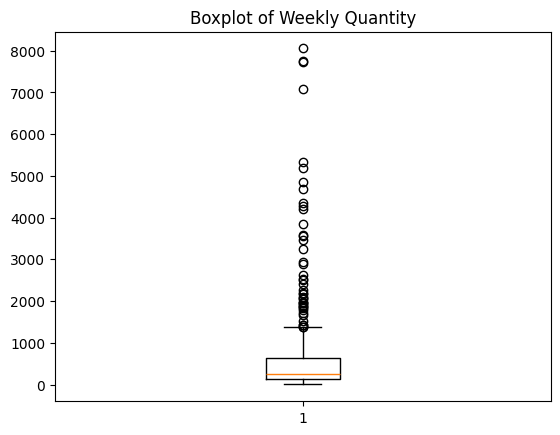

In [31]:
import matplotlib.pyplot as plt
plt.boxplot(df['quantity'])
plt.title('Boxplot of Weekly Quantity')
plt.show()

### B. Visualizations

#### Sales Over Time

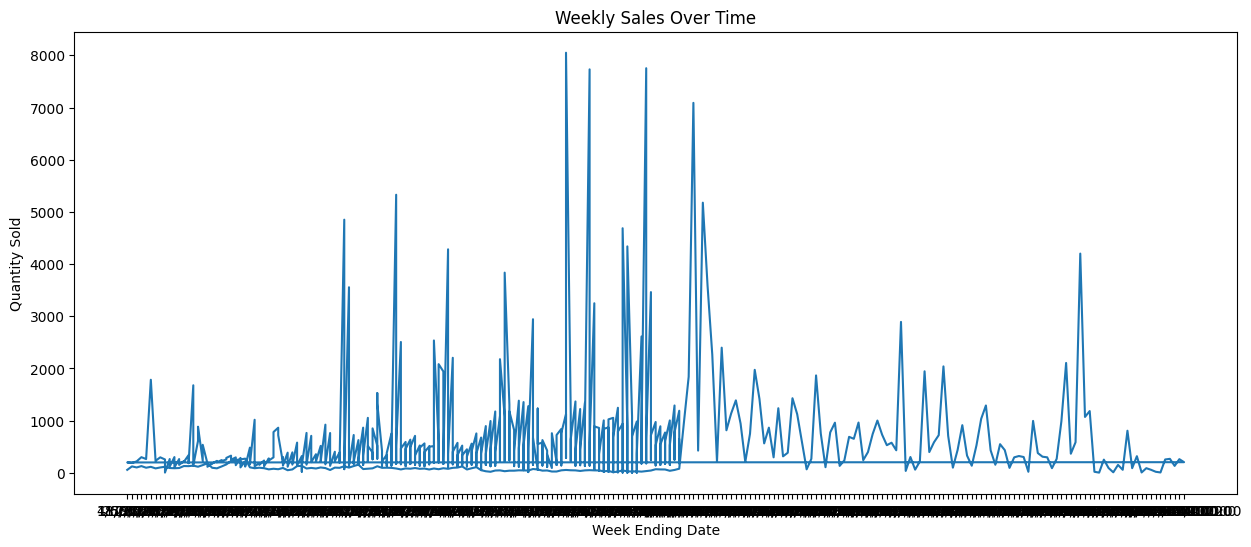

In [32]:
plt.figure(figsize=(15,6))
plt.plot(df['weekend_date'], df['quantity'])
plt.title('Weekly Sales Over Time')
plt.xlabel('Week Ending Date')
plt.ylabel('Quantity Sold')
plt.show()

#### Seasonality and Trends

C:\Users\KIIT\AppData\Local\Temp\ipykernel_19044\2695656848.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['quantity'].resample('M').sum().plot(kind='bar')


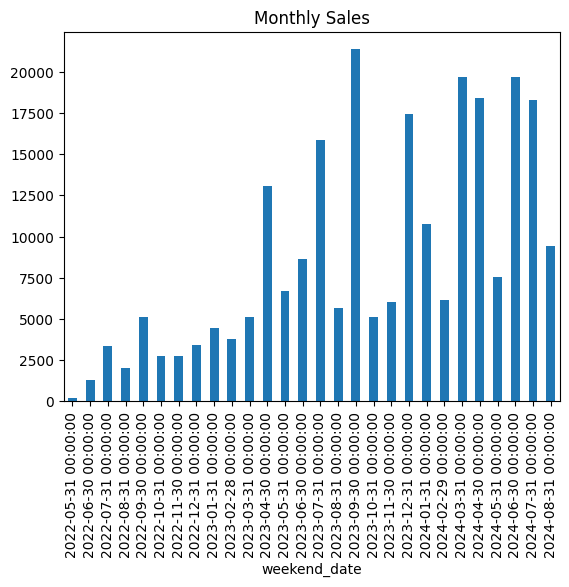

In [78]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Load data and fix column typo
df = pd.read_csv('sales_data.csv')
df.rename(columns={'SerailNum': 'SerialNum'}, inplace=True)

# 2. Robust date parsing for mixed formats
df['weekend_date'] = pd.to_datetime(df['weekend_date'], dayfirst=True, errors='coerce')

# 3. Check and drop invalid dates
df = df.dropna(subset=['weekend_date'])

# 4. Set index
df = df.set_index('weekend_date')

# 5. Plot monthly sales
df['quantity'].resample('M').sum().plot(kind='bar')
plt.title('Monthly Sales')
plt.show()

#### Group by Category/Brand/Channel

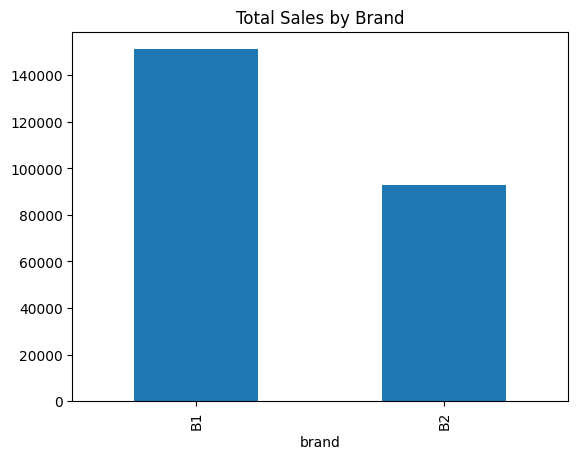

In [79]:
df.groupby('brand')['quantity'].sum().plot(kind='bar')
plt.title('Total Sales by Brand')
plt.show()

In [80]:
df.to_csv('sales_data_cleaned.csv', index=False)